In [ ]:
import pandas as pd
# import allel
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df_merge = pd.read_csv('/content/drive/MyDrive/SV_Callers/DFiltered/df_merged.csv')

In [ ]:
df_merge.to_csv("temp5.csv")

###3A - Sensitivity

In [ ]:
color_map = {
             'BREAKDANCER':'peru', 
             'clever':'gold', 
             'grom':'forestgreen', 
             'DELLY':'mediumorchid', 
             'gasv':'firebrick', 
             'tardis':'lime',
             'popdel':'navy', 
             'rdxplorer':'darkgray', 
             'smoove':'orangered',  
             'crest':'red', 
             'GENOMESTRIP':'pink',
             'manta':'aqua',
            'deepvariant':'rosybrown',
            'octopus':'coral'}

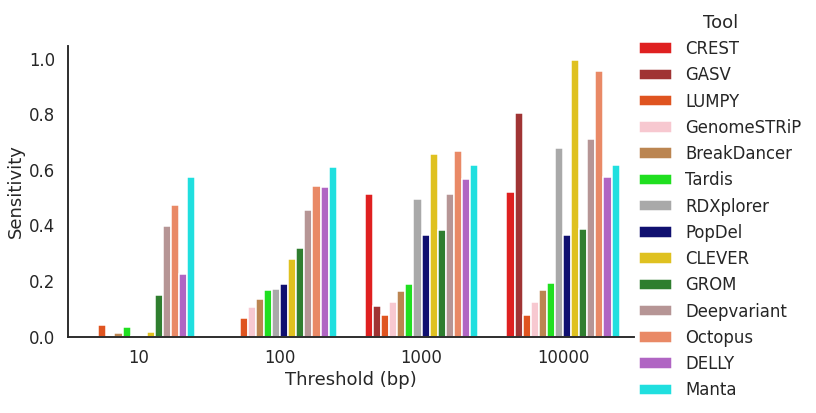

In [ ]:
%store -r
fig2a=sns.set_style("white")
fig2a=sns.set_context("talk")

fig_order = ['crest','gasv','smoove','GENOMESTRIP','BREAKDANCER','tardis','rdxplorer','popdel','clever',
             'grom','deepvariant','octopus','DELLY','manta']
labels    = ['CREST','GASV','LUMPY','GenomeSTRiP','BreakDancer','Tardis','RDXplorer','PopDel','CLEVER',
             'GROM','Deepvariant','Octopus','DELLY','Manta']
df_merge["Tool"] = df_merge["tool"].map(dict(zip(fig_order, labels)))

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

# plot_order = df_merge.groupby('threshold')['sensitivity'].values.sort_values(ascending=True).index.values
fig2a = sns.catplot(x="threshold", y="sensitivity", kind="bar",errwidth=2.5,data = df_merge,hue="Tool",aspect=1.8, palette=pal,hue_order=labels)
fig2a.set(xlabel='Threshold (bp)', ylabel='Sensitivity')
fig2a=sns.despine()
# plt.ylim(0,0.8)
plt.xticks(rotation=0)
#plt.show(fig2a)
# plt.yscale('symlog', linthreshy=0.001)

plt.savefig("/content/drive/MyDrive/SV_Callers/Figures_all/fig3a", bbox_inches='tight')
plt.savefig("/content/drive/MyDrive/SV_Callers/Figures_all/fig3a.pdf", bbox_inches='tight')

In [ ]:
print(df_merge['precision'])

0     0.059536
1     0.567104
2     0.676085
3     0.690212
4     0.301844
5     0.717244
6     0.756713
7     0.763507
8     0.760070
9     0.886165
10    0.900175
11    0.000047
12    0.000835
13    0.001983
14    0.003000
15    0.000475
16    0.502018
17    0.510088
18    0.022895
19    0.026153
20    0.029636
21    0.040936
22    0.000018
23    0.002071
24    0.015247
25    0.375985
26    0.791995
27    0.961189
28    0.966646
29    0.879688
30    0.933903
31    0.942815
32    0.945043
33    0.004487
34    0.005136
35    0.006306
36    0.009044
37    0.000642
38    0.502567
39    0.962131
40    0.967908
41    0.000157
42    0.012382
43    0.035406
44    0.048500
45    0.502924
46    0.815789
47    0.912281
48    0.921053
49    0.174346
50    0.863014
51    0.972603
52    0.981320
53    0.000000
54    0.000000
55    0.000000
Name: precision, dtype: float64


###3B - Precision

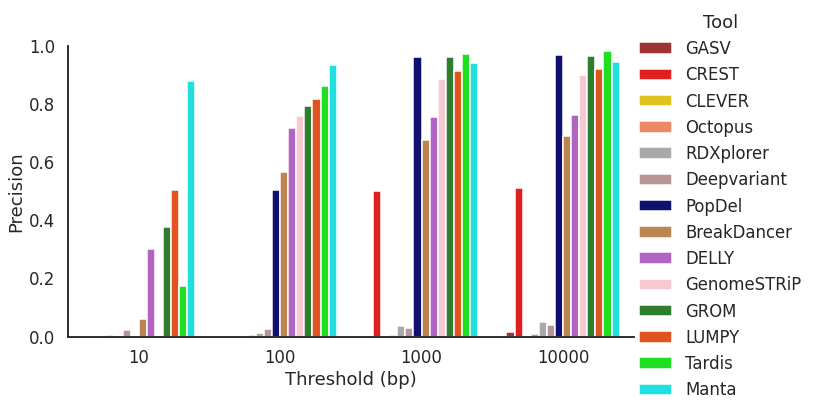

In [ ]:
%store -r
fig2b=sns.set_style("white")
fig2b=sns.set_context("talk")
fig_order = ['gasv','crest','clever','octopus','rdxplorer','deepvariant','popdel','BREAKDANCER','DELLY','GENOMESTRIP'
              ,'grom','smoove','tardis','manta']
labels = ['GASV','CREST','CLEVER','Octopus','RDXplorer','Deepvariant','PopDel','BreakDancer','DELLY',
       'GenomeSTRiP','GROM','LUMPY','Tardis','Manta']
pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig2b = sns.catplot(x="threshold", y="precision", kind="bar",errwidth=2.5,data = df_merge,hue='Tool',aspect=1.8, palette=pal,hue_order=labels)
plt.ylim(0, 1)
fig2b.set(xlabel='Threshold (bp)', ylabel='Precision')
fig2b=sns.despine()
#plt.show(fig2b)
# plt.yscale('symlog', linthreshy=0.001)

plt.savefig("/content/drive/MyDrive/SV_Callers/Figures_all/fig3b.png", bbox_inches='tight')
plt.savefig("/content/drive/MyDrive/SV_Callers/Figures_all/fig3b.pdf", bbox_inches='tight')

###Specificity

In [ ]:
df_temp=df_merge.loc[df_merge["threshold"]==1000]

In [ ]:
print(df_temp.loc[df_temp['tool'] == 'octopus','sensitivity'].sum()/7)
df_temp.loc[df_temp['tool'] == 'clever','sensitivity'].sum()/7

0.09528432732316228


0.09410540915395284

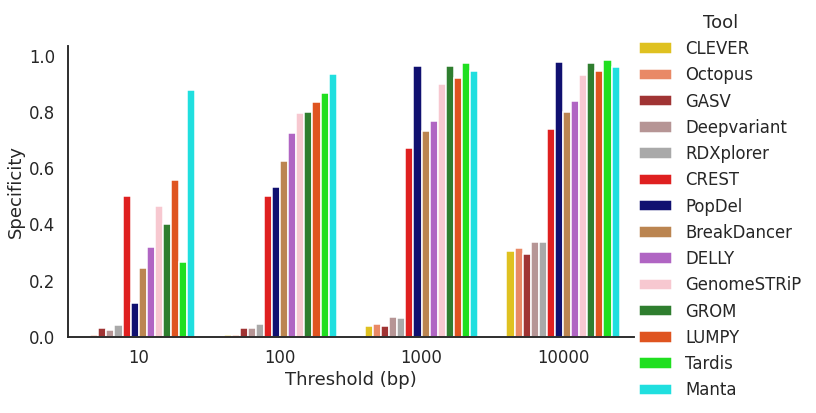

In [ ]:
%store -r
fig2c=sns.set_style("white")
fig2c=sns.set_context("talk")

fig_order = ['clever','octopus','gasv','deepvariant','rdxplorer','crest','popdel','BREAKDANCER','DELLY','GENOMESTRIP','grom',
              'smoove','tardis','manta']
labels    = ['CLEVER','Octopus','GASV','Deepvariant','RDXplorer','CREST','PopDel','BreakDancer','DELLY','GenomeSTRiP','GROM',
              'LUMPY','Tardis','Manta']

pal = []
for tool in fig_order:
    pal.append(color_map[tool])


fig2c = sns.catplot(x="threshold", y="specificity", kind="bar",errwidth=2.5,data = df_merge,hue='Tool',aspect=1.8, palette=pal,hue_order=labels)
fig2c.set(xlabel='Threshold (bp)', ylabel='Specificity')
fig2c=sns.despine()
#plt.show(fig2c)
# plt.yscale('symlog',linthreshy=0.001)
plt.savefig("/content/drive/MyDrive/SV_Callers/Figures_all/fig3c", bbox_inches='tight')
plt.savefig("/content/drive/MyDrive/SV_Callers/Figures_all/fig3c.pdf", bbox_inches='tight')

###Figure 3D - F Score

In [ ]:
print(df_temp.loc[df_temp['tool'] == 'grom','f-score'].sum()/7)
df_temp.loc[df_temp['tool'] == 'grom','f-score'].sum()/7

0.06468068188215191


0.06468068188215191

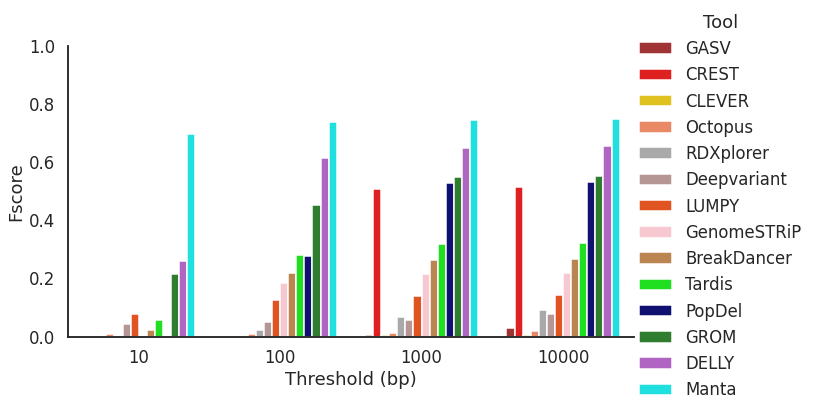

In [ ]:
import numpy as np

%store -r
fig2d=sns.set_style("white")
fig2d=sns.set_context("talk")

fig_order = ['gasv','crest','clever','octopus','rdxplorer','deepvariant','smoove','GENOMESTRIP','BREAKDANCER','tardis',
              'popdel','grom','DELLY','manta']
labels    = ['GASV','CREST','CLEVER','Octopus','RDXplorer','Deepvariant','LUMPY','GenomeSTRiP','BreakDancer','Tardis',
             'PopDel','GROM','DELLY','Manta']

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig2d = sns.catplot(x="threshold", y="f-score", kind="bar",errwidth=2.5,data = df_merge,hue='Tool',aspect=1.8, palette=pal,hue_order=labels)
fig2d.set(xlabel='Threshold (bp)', ylabel='Fscore')
fig2d=sns.despine()
# plt.yscale('symlog', linthreshy=0.001)
# plt.yticks([0,0.001,0.01,0.1,1])
plt.ylim(0, 1)
#plt.show(fig2d)
# plt.yscale('symlog',linthreshy=0.001)

plt.savefig("/content/drive/MyDrive/SV_Callers/Figures_all/fig3d", bbox_inches='tight')
plt.savefig("/content/drive/MyDrive/SV_Callers/Figures_all/fig3d.pdf", bbox_inches='tight')

In [ ]:
df_merge

,Unnamed: 0,tool,threshold,strain,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score,Tool
0,0,BREAKDANCER,10,human,59,932,302,4120,4061,0.014320,0.059536,0.244733,0.023087,BreakDancer
1,1,BREAKDANCER,100,human,562,429,713,4120,3558,0.136408,0.567104,0.624343,0.219918,BreakDancer
2,2,BREAKDANCER,1000,human,670,321,888,4120,3450,0.162621,0.676085,0.734491,0.262180,BreakDancer
3,3,BREAKDANCER,10000,human,684,307,1244,4120,3436,0.166019,0.690212,0.802063,0.267658,BreakDancer
4,4,DELLY,10,human,933,2158,1020,4120,3187,0.226456,0.301844,0.320957,0.258771,DELLY
5,5,DELLY,100,human,2217,874,2307,4120,1903,0.538107,0.717244,0.725244,0.614894,DELLY
6,6,DELLY,1000,human,2339,752,2522,4120,1781,0.567718,0.756713,0.770312,0.648731,DELLY
7,7,DELLY,10000,human,2360,731,3791,4120,1760,0.572816,0.763507,0.838346,0.654556,DELLY
8,8,GENOMESTRIP,100,human,434,137,534,4120,3686,0.105340,0.760070,0.795827,0.185035,GenomeSTRiP
9,9,GENOMESTRIP,1000,human,506,65,593,4120,3614,0.122816,0.886165,0.901216,0.215732,GenomeSTRiP


In [ ]:
df_mean=df_merge.groupby(['tool','threshold'],as_index=False).mean()
df_mean.head()

,tool,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
0,BREAKDANCER,10,0,59,932,302,4120,4061,0.014320,0.059536,0.244733,0.023087
1,BREAKDANCER,100,1,562,429,713,4120,3558,0.136408,0.567104,0.624343,0.219918
2,BREAKDANCER,1000,2,670,321,888,4120,3450,0.162621,0.676085,0.734491,0.262180
3,BREAKDANCER,10000,3,684,307,1244,4120,3436,0.166019,0.690212,0.802063,0.267658
4,DELLY,10,4,933,2158,1020,4120,3187,0.226456,0.301844,0.320957,0.258771


In [ ]:
fig_order = ['grom','BREAKDANCER','DELLY','GENOMESTRIP','manta','octopus','popdel','clever',
       'gasv','rdxplorer','deepvariant','tardis','crest','smoove']
labels    = ['GROM','BreakDancer','DELLY','GenomeSTRiP','Manta','Octopus','PopDel','CLEVER',
       'GASV','RDXplorer','Deepvariant','Tardis','CREST','LUMPY']
df_mean["Tool"] = df_mean["tool"].map(dict(zip(fig_order, labels)))

###Figure 3E

In [ ]:
color_map1 = color_map

NameError: ignored

In [ ]:
fig_order = ['grom','BREAKDANCER','DELLY','GENOMESTRIP','manta','octopus','popdel','clever',
       'gasv','rdxplorer','deepvariant','tardis','crest','smoove']
labels    = ['GROM','BreakDancer','DELLY','GenomeSTRiP','Manta','Octopus','PopDel','CLEVER',
       'GASV','RDXplorer','Deepvariant','Tardis','CREST','LUMPY']
         
df_mean["Tool"] = df_mean["tool"].map(dict(zip(fig_order, labels)))

In [ ]:
df_mean.loc[df_mean['threshold'] == 100]

,tool,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score,Tool
1,BREAKDANCER,100,1,562,429,713,4120,3558,0.136408,0.567104,0.624343,0.219918,BreakDancer
5,DELLY,100,5,2217,874,2307,4120,1903,0.538107,0.717244,0.725244,0.614894,DELLY
9,GENOMESTRIP,100,8,434,137,534,4120,3686,0.105340,0.760070,0.795827,0.185035,GenomeSTRiP
13,clever,100,12,1143,1367227,5512,4120,2977,0.277427,0.000835,0.004015,0.001666,CLEVER
17,crest,100,15,2,4211,4237,4120,4118,0.000485,0.000475,0.501539,0.000480,CREST
21,deepvariant,100,19,1870,69631,2237,4120,2250,0.453883,0.026153,0.031127,0.049457,Deepvariant
25,gasv,100,22,4,217807,6807,4120,4116,0.000971,0.000018,0.030305,0.000036,GASV
29,grom,100,26,1306,343,1377,4120,2814,0.316990,0.791995,0.800581,0.452765,GROM
33,manta,100,30,2515,178,2554,4120,1605,0.610437,0.933903,0.934846,0.738294,Manta
37,octopus,100,34,2238,433508,3116,4120,1882,0.543204,0.005136,0.007137,0.010176,Octopus


In [ ]:
fig_order = ['grom','BREAKDANCER','DELLY','GENOMESTRIP','manta','octopus','popdel','clever',
       'gasv','rdxplorer','deepvariant','tardis','crest','smoove']
labels    = ['GROM','BreakDancer','DELLY','GenomeSTRiP','Manta','Octopus','PopDel','CLEVER',
       'GASV','RDXplorer','Deepvariant','Tardis','CREST','LUMPY']
         
df_mean["Tool"] = df_mean["tool"].map(dict(zip(fig_order, labels)))

In [ ]:
df_mean.loc[df_mean['threshold'] == 100]

,tool,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score,Tool
1,BREAKDANCER,100,1,562,429,713,4120,3558,0.136408,0.567104,0.624343,0.219918,BreakDancer
5,DELLY,100,5,2217,874,2307,4120,1903,0.538107,0.717244,0.725244,0.614894,DELLY
9,GENOMESTRIP,100,8,434,137,534,4120,3686,0.105340,0.760070,0.795827,0.185035,GenomeSTRiP
13,clever,100,12,1143,1367227,5512,4120,2977,0.277427,0.000835,0.004015,0.001666,CLEVER
17,crest,100,15,2,4211,4237,4120,4118,0.000485,0.000475,0.501539,0.000480,CREST
21,deepvariant,100,19,1870,69631,2237,4120,2250,0.453883,0.026153,0.031127,0.049457,Deepvariant
25,gasv,100,22,4,217807,6807,4120,4116,0.000971,0.000018,0.030305,0.000036,GASV
29,grom,100,26,1306,343,1377,4120,2814,0.316990,0.791995,0.800581,0.452765,GROM
33,manta,100,30,2515,178,2554,4120,1605,0.610437,0.933903,0.934846,0.738294,Manta
37,octopus,100,34,2238,433508,3116,4120,1882,0.543204,0.005136,0.007137,0.010176,Octopus


In [ ]:
df_mean.dtypes

tool            object
threshold        int64
Unnamed: 0       int64
nTP              int64
nFP              int64
nTN              int64
n_true           int64
nFN              int64
sensitivity    float64
precision      float64
specificity    float64
f-score        float64
Tool            object
dtype: object

In [ ]:
threshold=10
data=df_mean.loc[df_mean['threshold'] == threshold]

In [ ]:
threshold=10
df_mean.loc[df_mean['threshold'] == threshold]

,tool,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score,Tool
0,BREAKDANCER,10,0,59,932,302,4120,4061,0.014320,0.059536,0.244733,0.023087,BreakDancer
4,DELLY,10,4,933,2158,1020,4120,3187,0.226456,0.301844,0.320957,0.258771,DELLY
8,GENOMESTRIP,10,53,0,571,496,4120,4120,0.000000,0.000000,0.464855,0.000000,GenomeSTRiP
12,clever,10,11,64,1368306,3802,4120,4056,0.015534,0.000047,0.002771,0.000093,CLEVER
16,crest,10,55,0,4213,4234,4120,4120,0.000000,0.000000,0.501243,0.000000,CREST
20,deepvariant,10,18,1637,69864,1669,4120,2483,0.397330,0.022895,0.023332,0.043295,Deepvariant
24,gasv,10,54,0,217811,6781,4120,4120,0.000000,0.000000,0.030193,0.000000,GASV
28,grom,10,25,620,1029,689,4120,3500,0.150485,0.375985,0.401048,0.214942,GROM
32,manta,10,29,2369,324,2400,4120,1751,0.575000,0.879688,0.881057,0.695435,Manta
36,octopus,10,33,1955,433791,1984,4120,2165,0.474515,0.004487,0.004553,0.008889,Octopus


In [ ]:
df_new=df_mean.loc[df_mean['threshold'] == 100]

In [ ]:
color_map = {
             'BREAKDANCER':'peru', 
             'clever':'gold', 
             'grom':'forestgreen', 
             'DELLY':'mediumorchid', 
             'gasv':'firebrick', 
             'tardis':'lime',
             'popdel':'navy', 
             'rdxplorer':'darkgray', 
             'smoove':'orangered',  
             'crest':'red', 
             'GENOMESTRIP':'pink',
             'manta':'aqua',
            'deepvariant':'rosybrown',
            'octopus':'coral'}

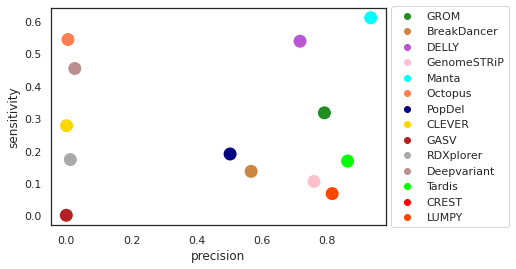

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.set_style("white")
# sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
tips = sns.load_dataset("tips")
pal = []
for tool in fig_order:
    pal.append(color_map[tool])
ax = sns.scatterplot(x="precision", y="sensitivity", data=df_new,hue='Tool',s=200,palette=pal,hue_order=labels)
ax.ticks=[0,0.2,0.4,0.6,0.8,1]
ax.legend(loc='center left', bbox_to_anchor=(1, .5), ncol=1)
sns.set(rc={'figure.figsize':(6,6)})
plt.savefig("/content/drive/MyDrive/SV_Callers/Figures_all/fig3e", bbox_inches='tight')
plt.savefig("/content/drive/MyDrive/SV_Callers/Figures_all/fig3e.pdf", bbox_inches='tight')

###Figure 3F

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.set_style("white")
# sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="precision", y="specificity", data=df_new,hue='Tool',s=200,palette=pal,hue_order=labels)
ax.ticks=[0,0.2,0.4,0.6,0.8,1]
ax.legend(loc='center left', bbox_to_anchor=(1, .5), ncol=1)
sns.set(rc={'figure.figsize':(6,6)})
plt.savefig("/content/drive/MyDrive/SV_Callers/Figures_all/fig3f", bbox_inches='tight')
plt.savefig("/content/drive/MyDrive/SV_Callers/Figures_all/fig3f.pdf", bbox_inches='tight')

In [ ]:
df_new.corr(method ='spearman')

,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
threshold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 0,NaN,1.000000,0.024176,-0.270330,-0.120879,NaN,-0.024176,0.024176,0.274725,0.248352,0.059341
nTP,NaN,0.024176,1.000000,0.204396,0.138462,NaN,-1.000000,1.000000,0.265934,0.010989,0.494505
nFP,NaN,-0.270330,0.204396,1.000000,0.828571,NaN,-0.204396,0.204396,-0.876923,-0.947253,-0.661538
nTN,NaN,-0.120879,0.138462,0.828571,1.000000,NaN,-0.138462,0.138462,-0.736264,-0.674725,-0.564835
n_true,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nFN,NaN,-0.024176,-1.000000,-0.204396,-0.138462,NaN,1.000000,-1.000000,-0.265934,-0.010989,-0.494505
sensitivity,NaN,0.024176,1.000000,0.204396,0.138462,NaN,-1.000000,1.000000,0.265934,0.010989,0.494505
precision,NaN,0.274725,0.265934,-0.876923,-0.736264,NaN,-0.265934,0.265934,1.000000,0.929670,0.868132
specificity,NaN,0.248352,0.010989,-0.947253,-0.674725,NaN,-0.010989,0.010989,0.929670,1.000000,0.797802
